In [30]:
import pandas as pd

# 분석에 필요한 주요 컬럼 리스트
selected_cols = [
    'ID',
    '이용건수_신용_B0M', '이용건수_신판_B0M', '이용건수_일시불_B0M', '이용금액_일시불_B0M',
    '이용후경과월_신용', '이용후경과월_일시불', '이용후경과월_체크', '이용금액_해외',
    '쇼핑_도소매_이용금액', '쇼핑_마트_이용금액', '쇼핑_온라인_이용금액',
    '교통_주유이용금액', '교통_정비이용금액', '여유_숙박이용금액',
    '할부건수_3M_R12M', '할부금액_3M_R12M', '할부건수_무이자_3M_R12M',
    'RP건수_B0M', 'RP건수_통신_B0M', 'RP건수_보험_B0M', 'RP건수_교통_B0M',
    'RP후경과월', '카드론이용건수_누적', '카드론이용금액_누적',
    '최종카드론_대출이율', '최종카드론_대출금액',
    '이용건수_온라인_R6M', '이용건수_오프라인_R6M',
    '이용건수_페이_온라인_R6M', '이용건수_페이_오프라인_R6M',
    '이용건수_간편결제_R6M', '이용건수_A페이_R6M', '이용건수_D페이_R6M',
    '이용금액_선결제_R6M', '이용건수_선결제_R6M',
    '연체입금원금_B0M', '정상청구원금_B2M', '선입금원금_B2M',
    '연속유실적개월수_기본_24M_카드', '승인거절건수_R3M', '승인거절건수_한도초과_R3M',
    '이용금액대'
]

# pyarrow 또는 fastparquet 설치 후 parquet 파일 로드
승인매출정보 = pd.read_parquet("merged_승인매출정보.parquet", columns=selected_cols)


In [31]:
# 숫자형 컬럼만 필터링
numeric_cols = 승인매출정보.select_dtypes(include='number').columns.tolist()

# ID와 함께 groupby
승인매출정보_집계 = (
    승인매출정보[['ID'] + numeric_cols]
    .groupby('ID', as_index=False)
    .mean()
)

In [32]:
print("회원정보 ID 고유값 수:", 회원정보['ID'].nunique())
print("승인매출정보 ID 고유값 수:", 승인매출정보['ID'].nunique())
print("승인매출정보 전체 행 수:", 승인매출정보.shape[0])

회원정보 ID 고유값 수: 400000
승인매출정보 ID 고유값 수: 400000
승인매출정보 전체 행 수: 2400000


In [33]:
승인매출정보 = 승인매출정보.drop_duplicates(subset='ID')  # 또는 groupby + mean
merged_df = pd.merge(회원정보, 승인매출정보, on='ID', how='left')

In [34]:
merged_df

,기준년월,ID,남녀구분코드,연령,Segment,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,...,이용건수_D페이_R6M,이용금액_선결제_R6M,이용건수_선결제_R6M,연체입금원금_B0M,정상청구원금_B2M,선입금원금_B2M,연속유실적개월수_기본_24M_카드,승인거절건수_R3M,승인거절건수_한도초과_R3M,이용금액대
0,201807,TRAIN_000000,2,40대,D,1,1,0,1,1,...,0,0,0,8104,16524,0,13,3,3,01.100만원+
1,201807,TRAIN_000001,1,30대,E,1,1,1,1,1,...,0,0,0,826,2420,0,12,3,3,03.30만원+
2,201807,TRAIN_000002,1,30대,C,1,1,0,1,1,...,0,0,0,9364,21826,0,8,0,0,01.100만원+
3,201807,TRAIN_000003,2,40대,D,1,1,0,1,2,...,0,0,0,10923,19172,0,5,3,3,01.100만원+
4,201807,TRAIN_000004,2,40대,E,1,1,1,1,1,...,0,0,0,0,272,0,0,0,0,09.미사용
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,2,70대이상,E,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,09.미사용
2399996,201812,TRAIN_399996,2,50대,D,1,1,1,1,1,...,0,0,0,1910,20929,0,20,0,0,01.100만원+
2399997,201812,TRAIN_399997,1,30대,C,1,1,0,1,1,...,0,0,0,856,8746,0,24,0,0,02.50만원+
2399998,201812,TRAIN_399998,1,40대,E,1,1,1,1,1,...,0,0,0,507,467,0,0,0,0,09.미사용


In [41]:
# 앞 2자리 숫자 코드만 추출해서 정수형으로 변환
X['이용금액대'] = X['이용금액대'].str[:2].astype(int)

C:\Users\somee\AppData\Local\Temp\ipykernel_6684\99830143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['이용금액대'] = X['이용금액대'].str[:2].astype(int)


In [42]:
print(X['이용금액대'].unique())
print(X['이용금액대'].dtype)

[1 3 9 4 2 5]
int32


In [44]:
# 로그 변환 (음수 방지)
for col in log_cols:
    X[col] = X[col].apply(lambda x: 0 if x < 0 else np.log1p(x))

# inf → NaN → 0
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(0, inplace=True)

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\somee\AppData\Local\Temp\ipykernel_6684\1432371131.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].apply(lambda x: 0 if x < 0 else np.log1p(x))
C:\Users\somee\AppData\Local\Temp\ipykernel_6684\1432371131.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\somee\AppData\Local\Temp\ipykernel_6684\1432371131.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 주요 변수 리스트
selected_cols = [
    '이용건수_신용_B0M', '이용건수_신판_B0M', '이용건수_일시불_B0M', '이용금액_일시불_B0M',
    '이용후경과월_신용', '이용후경과월_일시불', '이용후경과월_체크', '이용금액_해외',
    '쇼핑_도소매_이용금액', '쇼핑_마트_이용금액', '쇼핑_온라인_이용금액',
    '교통_주유이용금액', '교통_정비이용금액', '여유_숙박이용금액',
    '할부건수_3M_R12M', '할부금액_3M_R12M', '할부건수_무이자_3M_R12M',
    'RP건수_B0M', 'RP건수_통신_B0M', 'RP건수_보험_B0M', 'RP건수_교통_B0M',
    'RP후경과월', '카드론이용건수_누적', '카드론이용금액_누적',
    '최종카드론_대출이율', '최종카드론_대출금액',
    '이용건수_온라인_R6M', '이용건수_오프라인_R6M',
    '이용건수_페이_온라인_R6M', '이용건수_페이_오프라인_R6M',
    '이용건수_간편결제_R6M', '이용건수_A페이_R6M', '이용건수_D페이_R6M',
    '이용금액_선결제_R6M', '이용건수_선결제_R6M',
    '연체입금원금_B0M', '정상청구원금_B2M', '선입금원금_B2M',
    '연속유실적개월수_기본_24M_카드', '승인거절건수_R3M', '승인거절건수_한도초과_R3M',
    '이용금액대'
]

# ID와 Segment 포함된 전체 데이터프레임에서
merged_df['ID'] = merged_df['ID'].astype(str)  # ID는 문자열로 유지
y = merged_df['Segment']
X = merged_df[selected_cols]

# 결측치 처리
fill_zero_cols = ['최종카드론_대출금액', '최종카드론_대출이율', '카드론이용금액_누적', '카드론이용건수_누적',
                  '연체입금원금_B0M', '정상청구원금_B2M', '선입금원금_B2M']
X[fill_zero_cols] = X[fill_zero_cols].fillna(0)

# 로그 스케일 적용
log_cols = ['이용금액_일시불_B0M', '쇼핑_도소매_이용금액', '쇼핑_온라인_이용금액',
            '교통_주유이용금액', '여유_숙박이용금액', '최종카드론_대출금액',
            '카드론이용금액_누적', '이용금액_선결제_R6M']
for col in log_cols:
    X[col] = X[col].apply(lambda x: np.log1p(x))

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 모델 학습 준비 완료

C:\Users\somee\AppData\Local\Temp\ipykernel_6684\1908336042.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[fill_zero_cols] = X[fill_zero_cols].fillna(0)
C:\Users\somee\AppData\Local\Temp\ipykernel_6684\1908336042.py:39: RuntimeWarning: invalid value encountered in log1p
  X[col] = X[col].apply(lambda x: np.log1p(x))
C:\Users\somee\AppData\Local\Temp\ipykernel_6684\1908336042.py:39: RuntimeWarning: divide by zero encountered in log1p
  X[col] = X[col].apply(lambda x: np.log1p(x))
C:\Users\somee\AppData\Local\Temp\ipykernel_6684\1908336042.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

ValueError: could not convert string to float: '01.100만원+'

In [46]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# 1. 문자형 Segment → 숫자형으로 인코딩
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # 예: 'A' → 0, 'B' → 1, ...

# 2. train/validation 분할
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 3. XGBoost 모델 정의
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),     # 클래스 수 자동 설정
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

# 4. 모델 학습
xgb_model.fit(X_train, y_train)

# 5. 예측 및 평가
y_pred = xgb_model.predict(X_val)

# 6. 성능 리포트 출력 (문자형 라벨로 다시 출력)
print(classification_report(y_val, y_pred, target_names=le.classes_))


c:\Users\somee\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:14:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           A       1.00      1.00      1.00       194
           B       1.00      1.00      1.00        29
           C       0.77      0.55      0.64     25518
           D       0.67      0.52      0.59     69848
           E       0.91      0.97      0.94    384411

    accuracy                           0.88    480000
   macro avg       0.87      0.81      0.83    480000
weighted avg       0.87      0.88      0.87    480000



In [49]:
submission = pd.read_csv("../data/sample_submission.csv")
print(submission.head())

           ID Segment
0  TEST_00000       A
1  TEST_00001       A
2  TEST_00002       A
3  TEST_00003       A
4  TEST_00004       A


In [55]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)  # 문자형 Segment → 숫자형

In [56]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 2. SMOTE 오버샘플링 적용 (훈련 데이터만!)
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# 3. 클래스별 개수 확인
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_sm))

Before SMOTE: Counter({4: 1537641, 3: 279394, 2: 102072, 0: 778, 1: 115})
After SMOTE: Counter({4: 1537641, 2: 1537641, 3: 1537641, 0: 1537641, 1: 1537641})


In [57]:
import xgboost as xgb
from sklearn.metrics import classification_report

# 1. 모델 정의
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

# 2. 학습
xgb_model.fit(X_train_sm, y_train_sm)

# 3. 검증 예측
y_pred = xgb_model.predict(X_val)
print(classification_report(y_val, y_pred, target_names=le.classes_))

c:\Users\somee\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:26:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           A       0.97      1.00      0.98       194
           B       1.00      1.00      1.00        29
           C       0.51      0.76      0.61     25518
           D       0.47      0.68      0.55     69848
           E       0.96      0.85      0.90    384411

    accuracy                           0.82    480000
   macro avg       0.78      0.86      0.81    480000
weighted avg       0.87      0.82      0.84    480000



In [58]:
# 1. sample_submission 불러오기
submission = pd.read_csv("../data/sample_submission.csv")

# 2. ID 정렬을 위해 문자열 통일
submission['ID'] = submission['ID'].astype(str)
merged_df['ID'] = merged_df['ID'].astype(str)

# 3. ID 기준으로 테스트셋 추출
test_df = merged_df[merged_df['ID'].isin(submission['ID'])].copy()
X_test = test_df[selected_cols].copy()


In [60]:
print("submission ID 예시:", submission['ID'].head())
print("merged_df ID 예시:", merged_df['ID'].head())

submission ID 예시: 0    TEST_00000
1    TEST_00001
2    TEST_00002
3    TEST_00003
4    TEST_00004
Name: ID, dtype: object
merged_df ID 예시: 0    TRAIN_000000
1    TRAIN_000001
2    TRAIN_000002
3    TRAIN_000003
4    TRAIN_000004
Name: ID, dtype: object


In [61]:
import pandas as pd

# 1. 병합된 파일 불러오기
승인매출정보_test = pd.read_parquet("merged_승인매출정보_test.parquet")

# 2. 숫자형 컬럼만 선택해서 평균 집계
numeric_cols = 승인매출정보_test.select_dtypes(include='number').columns.tolist()
승인매출정보_test_grouped = (
    승인매출정보_test[['ID'] + numeric_cols]
    .groupby('ID', as_index=False)
    .mean()
)

# 3. 결과 확인
print("집계된 승인매출정보_test shape:", 승인매출정보_test_grouped.shape)

집계된 승인매출정보_test shape: (100000, 388)


In [65]:
승인매출정보_test

,기준년월,ID,최종이용일자_기본,최종이용일자_신판,최종이용일자_CA,최종이용일자_카드론,최종이용일자_체크,최종이용일자_일시불,최종이용일자_할부,이용건수_신용_B0M,...,승인거절건수_한도초과_B0M,승인거절건수_BL_B0M,승인거절건수_입력오류_B0M,승인거절건수_기타_B0M,승인거절건수_R3M,승인거절건수_한도초과_R3M,승인거절건수_BL_R3M,승인거절건수_입력오류_R3M,승인거절건수_기타_R3M,이용금액대
0,201807,TEST_00000,20180731,20180731,10101,10101,10101,20180731,20160913,28,...,0,0,0,0,0,0,0,0,0,02.50만원+
1,201807,TEST_00001,20180725,20180725,20170710,20171107,20180731,20180725,20180722,8,...,0,0,0,0,0,0,0,0,0,02.50만원+
2,201807,TEST_00002,20180711,20180711,10101,10101,10101,20180711,20160703,59,...,0,0,0,0,3,3,0,0,0,01.100만원+
3,201807,TEST_00003,20180731,20180731,20150822,20150801,10101,20180731,20160701,37,...,0,0,0,0,0,0,0,0,0,04.10만원+
4,201807,TEST_00004,20180716,20180716,20130917,10101,20180707,20180716,20180708,19,...,0,0,0,0,0,0,0,0,0,03.30만원+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,201812,TEST_99995,20170228,20170228,10101,10101,10101,20170228,10101,-1,...,0,0,0,0,0,0,0,0,0,09.미사용
599996,201812,TEST_99996,20181130,20181130,10101,10101,10101,20181130,10101,0,...,0,0,0,0,0,0,0,0,0,05.10만원-
599997,201812,TEST_99997,10101,10101,10101,10101,10101,10101,10101,3,...,0,0,0,0,0,0,0,0,0,09.미사용
599998,201812,TEST_99998,20181230,20181230,10101,10101,20181225,20181230,20180608,78,...,0,0,0,0,0,0,0,0,0,01.100만원+


In [68]:
# 1. 금액대 문자열 앞 두 자리 → 숫자
승인매출정보_test['이용금액대'] = (
    승인매출정보_test['이용금액대'].astype(str).str[:2].astype(int)
)

# 2. 숫자형 컬럼 확인
numeric_cols = 승인매출정보_test.select_dtypes(include='number').columns.tolist()

# 3. groupby 집계
승인매출정보_test_grouped = (
    승인매출정보_test[['ID'] + numeric_cols]
    .groupby('ID', as_index=False)
    .mean()
)

In [69]:
# 1. 예측용 컬럼만 선택
X_test = 승인매출정보_test_grouped[selected_cols].copy()

# 2. 로그 변환
for col in log_cols:
    X_test[col] = X_test[col].apply(lambda x: 0 if x < 0 else np.log1p(x))

# 3. NaN/inf 처리
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.fillna(0, inplace=True)


# 5. 스케일링
X_test_scaled = scaler.transform(X_test)

In [70]:
# 숫자형 예측
test_preds = xgb_model.predict(X_test_scaled)

# 문자형 Segment로 변환
test_labels = le.inverse_transform(test_preds)

In [71]:
# ID 컬럼 추출
submission = 승인매출정보_test_grouped[['ID']].copy()

# 예측 결과 넣기
submission['Segment'] = test_labels

# 저장
submission.to_csv("submission_final.csv", index=False)

In [72]:
# Segment별 분포 개수
submission['Segment'].value_counts()

Segment
D    51738
E    28535
C    19657
A       68
B        2
Name: count, dtype: int64

In [73]:
# 퍼센트(%)로 보기
segment_percent = submission['Segment'].value_counts(normalize=True).sort_index() * 100
print(segment_percent.round(2))

Segment
A     0.07
B     0.00
C    19.66
D    51.74
E    28.54
Name: proportion, dtype: float64


In [74]:
pd.Series(y_encoded).value_counts(normalize=True).sort_index() * 100

0     0.04050
1     0.00600
2     5.31625
3    14.55175
4    80.08550
Name: proportion, dtype: float64

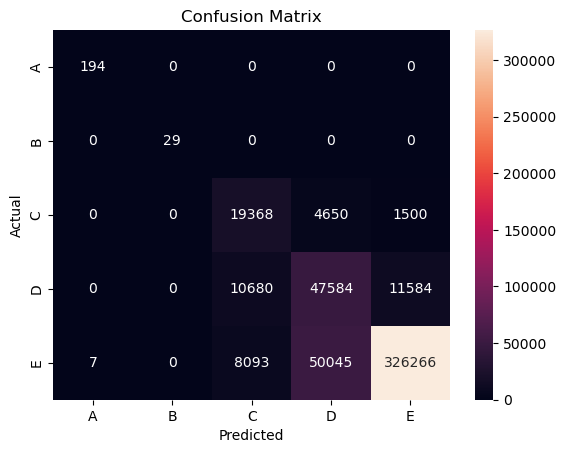

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_pred, labels=range(len(le.classes_)))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [76]:
from imblearn.over_sampling import SMOTE

# 너무 D로 쏠리는 걸 방지
smote = SMOTE(sampling_strategy={
    0: 1000,   # A
    1: 1000,   # B
    2: 5000,   # C
    3: 5000,   # D
    4: 10000   # E (D보다 많게)
}, random_state=42)